# Libraries

In [ ]:
#install.packages("dplyr")

In [ ]:
library(dplyr)

In [ ]:
#install.packages("tidyverse")

In [ ]:
library(tidyverse)

In [ ]:
library(forcats)

In [ ]:
install.packages("geosphere")

In [4]:
library(geosphere)

In [ ]:
install.packages("mice")

In [ ]:
library(mice)

In [ ]:
install.packages("caret")

In [ ]:
library(caret)

In [ ]:
install.packages("smotefamily")

In [10]:
library(smotefamily)

In [ ]:
install.packages("naivebayes")

In [ ]:
library(naivebayes)

In [859]:
install.packages("kernlab")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [860]:
library(kernlab)


Attaching package: ‘kernlab’


The following object is masked from ‘package:mice’:

    convergence


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:ggplot2’:

    alpha




# Yelp Data

## Data Import

In [542]:
data <- read.csv(file="final.csv", header=TRUE,sep=",",dec=";")

## Cleaning & Check

In [529]:
nrow(data)

[1] 5272

In [543]:
#Drop some columns:

data <- data %>%
    select(-name,-address,-city,-state,-business_open,-categories,-hours,)

In [531]:
str(data)

'data.frame':	5272 obs. of  40 variables:
 $ business_id               : chr  "00AGVWzkxNLGb-7ZrwAOIA" "00AGVWzkxNLGb-7ZrwAOIA" "00rIcvqmfci_oJWkOqPqmg" "00rIcvqmfci_oJWkOqPqmg" ...
 $ postal_code               : int  19139 19139 19128 19128 19118 19118 19147 19147 19146 19146 ...
 $ business_lat              : chr  "39.9532594" "39.9532594" "40.0571665" "40.0571665" ...
 $ business_long             : chr  "-75.2170205" "-75.2170205" "-75.2357367" "-75.2357367" ...
 $ overall_business_stars    : chr  "3.0" "3.0" "4.5" "4.5" ...
 $ overall_review_count      : int  70 70 92 92 61 61 101 101 65 65 ...
 $ isromantic                : chr  "False" "False" "False" "False" ...
 $ isintimate                : chr  "False" "False" "False" "False" ...
 $ istouristy                : chr  "False" "False" "False" "False" ...
 $ ishipster                 : chr  "False" "False" "False" "False" ...
 $ isdivey                   : chr  "True" "True" "False" "False" ...
 $ isclassy                  : chr  

### Recoding Attributes

In [ ]:
#Assumtion:

#If given attribute is not stated in Yelp -> count is as "False" for respective restorant.

# Except for Price Level -> will iterated via mice.

In [544]:
# Creating a function to recode attributes:

recode_column <- function(data, column_name) {
  data %>%
    mutate(!!sym(column_name) := na_if(!!sym(column_name), 'NULL')) %>%
    mutate(
      !!sym(column_name) := replace_na(!!sym(column_name), "False"),
      !!sym(column_name) := recode(!!sym(column_name),
                                   "False" = "0",
                                   "True" = "1")
    )

}

In [545]:
# Creating a function to recode attributes:

recode_column2 <- function(data, column_name) {
  data %>%
    mutate(!!sym(column_name) := na_if(!!sym(column_name), 'NULL')) %>%
    mutate(!!sym(column_name) := na_if(!!sym(column_name), 'None')) %>%
    mutate(
      !!sym(column_name) := replace_na(!!sym(column_name), "False"),
      !!sym(column_name) := recode(!!sym(column_name),
                                   "False" = "0",
                                   "True" = "1")
    )

}

In [546]:
library(forcats)

In [547]:
# Define the function
convert_and_relevel <- function(data, column_name, ref_level) {
  data[[column_name]] <- as.factor(data[[column_name]])
  data[[column_name]] <- fct_relevel(data[[column_name]], ref_level)
  return(data)
}


Ambiance Tag Attributes

In [548]:
#Check:

data %>%
    select(isromantic, isintimate, istouristy, ishipster, isdivey, isclassy, istrendy, isupscale, iscasual) %>%
      slice_head(n=8)

isromantic,isintimate,istouristy,ishipster,isdivey,isclassy,istrendy,isupscale,iscasual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
False,False,False,False,True,False,False,False,False
False,False,False,False,True,False,False,False,False
False,False,False,False,False,False,False,False,False
False,False,False,False,False,False,False,False,False
False,False,False,False,False,False,False,False,False
False,False,False,False,False,False,False,False,False
NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL


In [549]:
#Apply formula into tags
 # + change them into integer:

data <- recode_column(data, "isromantic")
data <- convert_and_relevel(data, "isromantic", "0")

data <- recode_column(data, "isintimate")
data <- convert_and_relevel(data, "isintimate", "0")

data <- recode_column(data, "istouristy")
data <- convert_and_relevel(data, "istouristy", "0")

data <- recode_column(data, "ishipster")
data <- convert_and_relevel(data, "ishipster", "0")

data <- recode_column(data, "isdivey")
data <- convert_and_relevel(data, "isdivey", "0")

data <- recode_column(data, "isclassy")
data <- convert_and_relevel(data, "isclassy", "0")

data <- recode_column(data, "istrendy")
data <- convert_and_relevel(data, "istrendy", "0")

data <- recode_column(data, "isupscale")
data <- convert_and_relevel(data, "isupscale", "0")

data <- recode_column(data, "iscasual")
data <- convert_and_relevel(data, "iscasual", "0")

In [550]:
#Check:

data %>%
    select(isromantic, isintimate, istouristy, ishipster, isdivey, isclassy, istrendy, isupscale, iscasual) %>%
      slice_head(n=8)

isromantic,isintimate,istouristy,ishipster,isdivey,isclassy,istrendy,isupscale,iscasual
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
0,0,0,0,1,0,0,0,0
0,0,0,0,1,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0


Parking Attributes

In [551]:
#Check:

data %>%
    select(parking_garage, parking_street, parking_validated, parking_lot, parking_valet) %>%
      slice_head(n=5)

parking_garage,parking_street,parking_validated,parking_lot,parking_valet
<chr>,<chr>,<chr>,<chr>,<chr>
False,True,False,False,False
False,True,False,False,False
False,True,False,True,False
False,True,False,True,False
False,False,False,False,False


In [552]:
#Apply formula into tags
 # + change them into integer:

data <- recode_column(data, "parking_garage")
data$parking_garage <- as.integer(data$parking_garage)

data <- recode_column(data, "parking_street")
data$parking_street <- as.integer(data$parking_street)

data <- recode_column(data, "parking_validated")
data$parking_validated <- as.integer(data$parking_validated)

data <- recode_column(data, "parking_lot")
data$parking_lot <- as.integer(data$parking_lot)

data <- recode_column(data, "parking_valet")
data$parking_valet <- as.integer(data$parking_valet)

In [553]:
#Creating parking_total variable:

data <- data %>%
    mutate(parking_total = parking_garage + parking_street + parking_validated + parking_lot + parking_valet) %>%
      mutate(parking_total = if_else(parking_total == 0, 0, 1))

In [554]:
data <- convert_and_relevel(data, "parking_total", "0")

data <- convert_and_relevel(data, "parking_garage", "0")

data <- convert_and_relevel(data, "parking_street", "0")

data <- convert_and_relevel(data, "parking_validated", "0")

data <- convert_and_relevel(data, "parking_lot", "0")

data <- convert_and_relevel(data, "parking_valet", "0")

In [555]:
#Check:

data %>%
    select(parking_garage, parking_street, parking_validated, parking_lot, parking_valet, parking_total) %>%
      slice_head(n=5)

parking_garage,parking_street,parking_validated,parking_lot,parking_valet,parking_total
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
0,1,0,0,0,1
0,1,0,0,0,1
0,1,0,1,0,1
0,1,0,1,0,1
0,0,0,0,0,0


Alcohol

In [556]:
#Check:

unique(data$alcohol)

[1] "none'"           "full_bar'"       "NULL"            "'none'"         
[5] "'full_bar'"      "beer_and_wine'"  "'beer_and_wine'"

In [557]:
# Factor values are represented in more than two ways:
     #[none\'''full_bar\'''NULL''\'none\'''\'full_bar\'''beer_and_wine\'''\'beer_and_wine\'']:

# Check unique values before recoding
unique(data$alcohol)

# Fix the problem by replacing incorrect factors
data <- data %>%
  mutate(alcohol = recode(alcohol,
                          "none'" = "Non_alcohol",
                          "'none'" = "Non_alcohol",
                          "full_bar'" = "Full_bar",
                          "'full_bar'" = "Full_bar",
                          "beer_and_wine'" = "Beer_and_wine",
                          "'beer_and_wine'" = "Beer_and_wine"))

# Check unique values after recoding
unique(data$alcohol)

[1] "none'"           "full_bar'"       "NULL"            "'none'"         
[5] "'full_bar'"      "beer_and_wine'"  "'beer_and_wine'"

[1] "Non_alcohol"   "Full_bar"      "NULL"          "Beer_and_wine"

In [558]:
#Changing NA's into Non_alcohol, as its not stated in Yelp:

data <- data %>%
  mutate(alcohol = na_if(alcohol, 'NULL')) %>%
      mutate(alcohol = replace_na(alcohol, "Non_alcohol")
  )

In [559]:
data$alcohol <- as.factor(data$alcohol)

# Redo the releveling:
data$alcohol=relevel(data$alcohol,ref="Non_alcohol")

In [560]:
unique(data$alcohol)

[1] Non_alcohol   Full_bar      Beer_and_wine
Levels: Non_alcohol Beer_and_wine Full_bar

WIFI

In [561]:
#Check:

unique(data$wifi)

[1] "no'"    "'free'" "free'"  "NULL"   "'no'"   "paid'"  "'paid'" "None"

In [562]:
# Factor values are represented in more than two ways:
     #[none\'''full_bar\'''NULL''\'none\'''\'full_bar\'''beer_and_wine\'''\'beer_and_wine\'']:

# Check unique values before recoding
unique(data$wifi)

# Fix the problem by replacing incorrect factors
data <- data %>%
  mutate(wifi = recode(wifi,
                          'no\'' = "No",
                          '\'no\'' = "No",
                          'None' = "No",
                          '\'free\'' = "Free",
                          'free\'' = "Free",
                          'paid\'' = "Paid",
                          '\'paid\'' = "Paid"))

# Check unique values after recoding
unique(data$wifi)

[1] "no'"    "'free'" "free'"  "NULL"   "'no'"   "paid'"  "'paid'" "None"

[1] "No"   "Free" "NULL" "Paid"

In [563]:
#Changing NA's into No, as its not stated in Yelp:

data <- data %>%
  mutate(wifi = na_if(wifi, 'NULL')) %>%
      mutate(wifi = replace_na(wifi, "No")
  )

In [564]:
data$wifi <- as.factor(data$wifi)

# Redo the releveling:
data$wifi=relevel(data$wifi,ref="No")

In [565]:
unique(data$wifi)

[1] No   Free Paid
Levels: No Free Paid

Restaurant Price Range

In [566]:
#Adjustment for data$restaurantspricerange2:

# NA values are represented in two ways: 'NULL' and 'None':

unique(data$restaurantspricerange2)

# To fix problem: Replace

data <- data %>%
  mutate(restaurantspricerange2 = na_if(restaurantspricerange2, 'NULL')) %>%
  mutate(restaurantspricerange2 = na_if(restaurantspricerange2, 'None'))

unique(data$restaurantspricerange2)

[1] "1"    "2"    "NULL" "3"    "4"    "None"

[1] "1" "2" NA  "3" "4"

In [567]:
data$restaurantspricerange2 <- as.integer(data$restaurantspricerange2)

Rest Attributes

In [568]:
#Check:

unique(data$outdoorseating)

unique(data$restaurantstableservice)

unique(data$bikeparking)

unique(data$happyhour)

unique(data$byob)

unique(data$businessacceptscreditcards)

unique(data$restaurantscounterservice)

unique(data$hastv)

unique(data$restaurantsreservations)

unique(data$restaurantsdelivery)

unique(data$restaurantstakeout)

[1] "False" "True"  "None"  "NULL"

[1] "NULL"  "False" "True"

[1] "True"  "False" "NULL"  "None"

[1] "NULL"  "False" "True"

[1] "NULL"  "False" "True"

[1] "False" "True"  "NULL"

[1] "NULL" "True"

[1] "True"  "False" "NULL"

[1] "False" "True"  "NULL"  "None"

[1] "True"  "False" "NULL"  "None"

[1] "True"  "False" "NULL"  "None"

In [569]:
#Apply formula into tags
 # + change them into integer:

data <- recode_column2(data, "outdoorseating")
data <- convert_and_relevel(data, "outdoorseating", "0")

data <- recode_column(data, "restaurantstableservice")
data <- convert_and_relevel(data, "restaurantstableservice", "0")

data <- recode_column2(data, "bikeparking")
data <- convert_and_relevel(data, "bikeparking", "0")

data <- recode_column(data, "happyhour")
data <- convert_and_relevel(data, "happyhour", "0")

data <- recode_column(data, "byob")
data <- convert_and_relevel(data, "byob", "0")

data <- recode_column(data, "businessacceptscreditcards")
data <- convert_and_relevel(data, "businessacceptscreditcards", "0")

data <- recode_column(data, "restaurantscounterservice")
data <- convert_and_relevel(data, "restaurantscounterservice", "0")

data <- recode_column(data, "hastv")
data <- convert_and_relevel(data, "hastv", "0")

data <- recode_column2(data, "restaurantsreservations")
data <- convert_and_relevel(data, "restaurantsreservations", "0")

data <- recode_column2(data, "restaurantsdelivery")
data <- convert_and_relevel(data, "restaurantsdelivery", "0")

data <- recode_column2(data, "restaurantstakeout")
data <- convert_and_relevel(data, "restaurantstakeout", "0")

### Recoding Variables

In [570]:
str(data)

'data.frame':	5272 obs. of  41 variables:
 $ business_id               : chr  "00AGVWzkxNLGb-7ZrwAOIA" "00AGVWzkxNLGb-7ZrwAOIA" "00rIcvqmfci_oJWkOqPqmg" "00rIcvqmfci_oJWkOqPqmg" ...
 $ postal_code               : int  19139 19139 19128 19128 19118 19118 19147 19147 19146 19146 ...
 $ business_lat              : chr  "39.9532594" "39.9532594" "40.0571665" "40.0571665" ...
 $ business_long             : chr  "-75.2170205" "-75.2170205" "-75.2357367" "-75.2357367" ...
 $ overall_business_stars    : chr  "3.0" "3.0" "4.5" "4.5" ...
 $ overall_review_count      : int  70 70 92 92 61 61 101 101 65 65 ...
 $ isromantic                : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ isintimate                : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ istouristy                : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ ishipster                 : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ isdivey                   : Factor w/ 2 levels "0","1": 2 2

In [571]:
data$business_id  <- as.character(data$business_id)

data$postal_code  <- as.integer(data$postal_code)

data$business_lat <- as.numeric(data$business_lat)

data$business_long <- as.numeric(data$business_long)

data$overall_business_stars <- as.numeric(data$overall_business_stars)

data$overall_review_count <- as.integer(data$overall_review_count)

data$n_photo <- as.integer(data$n_photo)

data$year <- as.integer(data$year)

data$attribute_count <- as.integer(data$attribute_count)

data$check_in_count <- as.integer(data$check_in_count)

data$review_count <- as.integer(data$review_count)

data$average_stars <- as.numeric(data$average_stars)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [572]:
summary(data)

 business_id         postal_code     business_lat   business_long   
 Length:5272        Min.   :19101   Min.   :39.87   Min.   :-75.33  
 Class :character   1st Qu.:19106   1st Qu.:39.95   1st Qu.:-75.18  
 Mode  :character   Median :19123   Median :39.95   Median :-75.16  
                    Mean   :19124   Mean   :39.97   Mean   :-75.15  
                    3rd Qu.:19145   3rd Qu.:39.99   3rd Qu.:-75.14  
                    Max.   :19195   Max.   :40.13   Max.   :-74.96  
                                                                    
 overall_business_stars overall_review_count isromantic isintimate istouristy
 Min.   :1.00           Min.   :   5.0       0:5154     0:5102     0:5220    
 1st Qu.:3.50           1st Qu.:  38.0       1: 118     1: 170     1:  52    
 Median :4.00           Median :  98.0                                       
 Mean   :3.65           Mean   : 202.3                                       
 3rd Qu.:4.00           3rd Qu.: 235.2                    

In [573]:
sum(is.na(data$restaurantspricerange2))

[1] 334

Dealing with NA's in attribute_count

In [575]:
sum(is.na(data$attribute_count))

data$attribute_count  <- as.character(data$attribute_count)

data <- data %>%
    mutate(attribute_count = replace_na(attribute_count, "0"))

data$attribute_count <- as.integer(data$attribute_count)

sum(is.na(data$attribute_count))

# External: Population Data

## Data Import

In [577]:
population_by_zip_2010 <- read.csv(file="population_by_zip_2010.csv", header=TRUE,sep=",",dec=";")

## Cleaning & Check

In [578]:
nrow(population_by_zip_2010)

n_distinct(population_by_zip_2010$zipcode)

[1] 1622831

[1] 33119

In [579]:
#To observe structure of dataset:

population_by_zip_2010 %>%
  filter(zipcode == "61747") %>%
    arrange(desc(population)) %>%
      slice_head(n=5)

population,minimum_age,maximum_age,gender,zipcode,geo_id
<int>,<int>,<int>,<chr>,<int>,<chr>
1560,NA,NA,,61747,8600000US61747
815,NA,NA,female,61747,8600000US61747
745,NA,NA,male,61747,8600000US61747
72,45,49,male,61747,8600000US61747
72,85,NA,female,61747,8600000US61747


In [434]:
args(if_else)

function (condition, true, false, missing = NULL, ..., ptype = NULL, 
    size = NULL) 
NULL

In [580]:
#Replacing space ('') values with 'NULL' to be able to filter properly:

population_by_zip_2010 <- population_by_zip_2010 %>%
  mutate(gender = if_else(!gender %in% c("female", "male"), "NULL", gender))

In [581]:
# Creating the Population by Zipcode, with age subgroups:

pop_by_zip <- population_by_zip_2010 %>%
  group_by(zipcode) %>%
  summarise(
    total_population = sum(population[is.na(minimum_age) & is.na(maximum_age) & gender == "NULL"], na.rm = TRUE),
    total_population_children = sum(population[minimum_age >= 0 & maximum_age <= 14], na.rm = TRUE),
    total_population_youth = sum(population[minimum_age >= 15 & maximum_age <= 24], na.rm = TRUE),
    total_population_adults = sum(population[minimum_age >= 25 & maximum_age <= 64], na.rm = TRUE),
    total_population_seniors = sum(population[minimum_age >= 65], na.rm = TRUE)
  )

In [582]:
# Changing "zipcode" column name into "postal_code"; to match both dataset:

pop_by_zip <- pop_by_zip %>%
  rename(postal_code = zipcode)

In [583]:
# Control:

pop_by_zip %>%
  filter(postal_code == "61747")

postal_code,total_population,total_population_children,total_population_youth,total_population_adults,total_population_seniors
<int>,<int>,<int>,<int>,<int>,<int>
61747,1560,345,150,754,311


In [584]:
# To compare calculations with orginal dataset values:

population_by_zip_2010 %>%
  filter(zipcode == "61747") %>%
    arrange(desc(population)) %>%
      slice_head(n = 3)

population,minimum_age,maximum_age,gender,zipcode,geo_id
<int>,<int>,<int>,<chr>,<int>,<chr>
1560,NA,NA,NULL,61747,8600000US61747
815,NA,NA,female,61747,8600000US61747
745,NA,NA,male,61747,8600000US61747


## Left Join into Dataset

In [585]:
# Left Join into Yelp Data

data <- data %>%
            left_join(pop_by_zip, by="postal_code")

# Calculation: Nearby Businesses


## Pairwise Distance Calculation

In [ ]:
#install.packages("geosphere")

In [586]:
library(geosphere)

In [587]:
# Selecting columns for distance matrix calculation:

data_1 <- data %>%
  select(business_id, business_lat, business_long)

In [588]:
# Calculate pairwise distances for all businesses:
df_distances <- data_1 %>%
  mutate(distances = apply(data_1[, c("business_long", "business_lat")], 1, function(x) distHaversine(data_1[, c("business_long", "business_lat")], x))) %>%
    select(business_id, distances)

In [589]:
# Seting a threshold distance (in meters)
threshold_distance <- 1000

# Filtering distances to find nearby businesses
nearby_counts <- df_distances %>%
  mutate(nearby_count = rowSums(distances <= threshold_distance), nearby_count_minus_1 = nearby_count - 1) %>% #adjusting for each business counting itself (subtracting 1 from each count)
    select(business_id, nearby_count_minus_1)

# Results
head(nearby_counts)

,business_id,nearby_count_minus_1
,<chr>,<dbl>
1,00AGVWzkxNLGb-7ZrwAOIA,163
2,00AGVWzkxNLGb-7ZrwAOIA,163
3,00rIcvqmfci_oJWkOqPqmg,11
4,00rIcvqmfci_oJWkOqPqmg,11
5,01mP5a06zQpaYOakfaVBOQ,45
6,01mP5a06zQpaYOakfaVBOQ,45


## Left Join into Dataset

In [590]:
#Filtering for unique/distinct values before left-join:

nearby_counts <- nearby_counts %>%
    distinct(business_id, nearby_count_minus_1)

In [591]:
#For nearby_counts, i.e. business_proximity

data <- data %>%
            left_join(nearby_counts, by="business_id")

In [592]:
head(data)

,business_id,postal_code,business_lat,business_long,overall_business_stars,overall_review_count,isromantic,isintimate,istouristy,ishipster,⋯,check_in_count,review_count,average_stars,parking_total,total_population,total_population_children,total_population_youth,total_population_adults,total_population_seniors,nearby_count_minus_1
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<int>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,00AGVWzkxNLGb-7ZrwAOIA,19139,39.95326,-75.21702,3.0,70,0,0,0,0,⋯,2,6,2.0000,1,41271,8924,6658,20247,5442,163
2,00AGVWzkxNLGb-7ZrwAOIA,19139,39.95326,-75.21702,3.0,70,0,0,0,0,⋯,2,0,0.0000,1,41271,8924,6658,20247,5442,163
3,00rIcvqmfci_oJWkOqPqmg,19128,40.05717,-75.23574,4.5,92,0,0,0,0,⋯,8,8,4.7500,1,35239,4124,5312,20997,4806,11
4,00rIcvqmfci_oJWkOqPqmg,19128,40.05717,-75.23574,4.5,92,0,0,0,0,⋯,6,14,4.9286,1,35239,4124,5312,20997,4806,11
5,01mP5a06zQpaYOakfaVBOQ,19118,40.07279,-75.19495,2.5,61,0,0,0,0,⋯,5,5,2.2000,0,9808,1402,1373,5324,1709,45
6,01mP5a06zQpaYOakfaVBOQ,19118,40.07279,-75.19495,2.5,61,0,0,0,0,⋯,4,5,2.6000,0,9808,1402,1373,5324,1709,45


# Base Model

## Creating a Subset

In [ ]:
#install.packages("mice")

In [ ]:
library(mice)

In [593]:
# Selecting the variables for analysis:
data_to_analysis <- data %>%
    select(check_in_count, average_stars, nearby_count_minus_1, attribute_count, restaurantspricerange2, happyhour,
                    total_population, total_population_children, total_population_youth, total_population_adults) # Adding external population data variables)

## *Running the Model with NA's (Pre-Mice)

In [ ]:
# Check_in_frequency = β0 + β1 * avg_number_of_stars + β2 * business_proximity + β3 * number of characteristics + β4 * (price_level x happy hour) + ε

In [ ]:
install.packages("car") #test
library(car)

In [594]:
model_pre_mice <- lm(check_in_count ~
              average_stars
              + nearby_count_minus_1
              + attribute_count
              + restaurantspricerange2 * happyhour
              + total_population
              + total_population_children
              + total_population_youth
              + total_population_adults
                                                   ,data_to_analysis)

In [595]:
#car::vif(m1) #test
summary(model_pre_mice)


Call:
lm(formula = check_in_count ~ average_stars + nearby_count_minus_1 + 
    attribute_count + restaurantspricerange2 * happyhour + total_population + 
    total_population_children + total_population_youth + total_population_adults, 
    data = data_to_analysis)

Residuals:
    Min      1Q  Median      3Q     Max 
 -89.02  -25.62   -9.48    8.23 1448.21 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -4.153e+01  4.873e+00  -8.521  < 2e-16 ***
average_stars                      5.874e+00  8.658e-01   6.785 1.29e-11 ***
nearby_count_minus_1               2.590e-02  2.868e-03   9.029  < 2e-16 ***
attribute_count                    3.514e+00  2.609e-01  13.465  < 2e-16 ***
restaurantspricerange2             9.058e+00  1.780e+00   5.088 3.75e-07 ***
happyhour1                        -2.954e+00  8.587e+00  -0.344  0.73086    
total_population                  -2.362e-03  8.186e-04  -2.885  0.00393 ** 
total_p

In [ ]:
# (346 observations deleted due to missingness)

## Pattern of Missings

In [481]:
args(md.pattern)

function (x, plot = TRUE, rotate.names = FALSE) 
NULL

,check_in_count,average_stars,nearby_count_minus_1,attribute_count,happyhour,total_population,total_population_children,total_population_youth,total_population_adults,restaurantspricerange2,
4926,1,1,1,1,1,1,1,1,1,1,0
332,1,1,1,1,1,1,1,1,1,0,1
12,1,1,1,1,1,0,0,0,0,1,4
2,1,1,1,1,1,0,0,0,0,0,5
,0,0,0,0,0,14,14,14,14,334,390


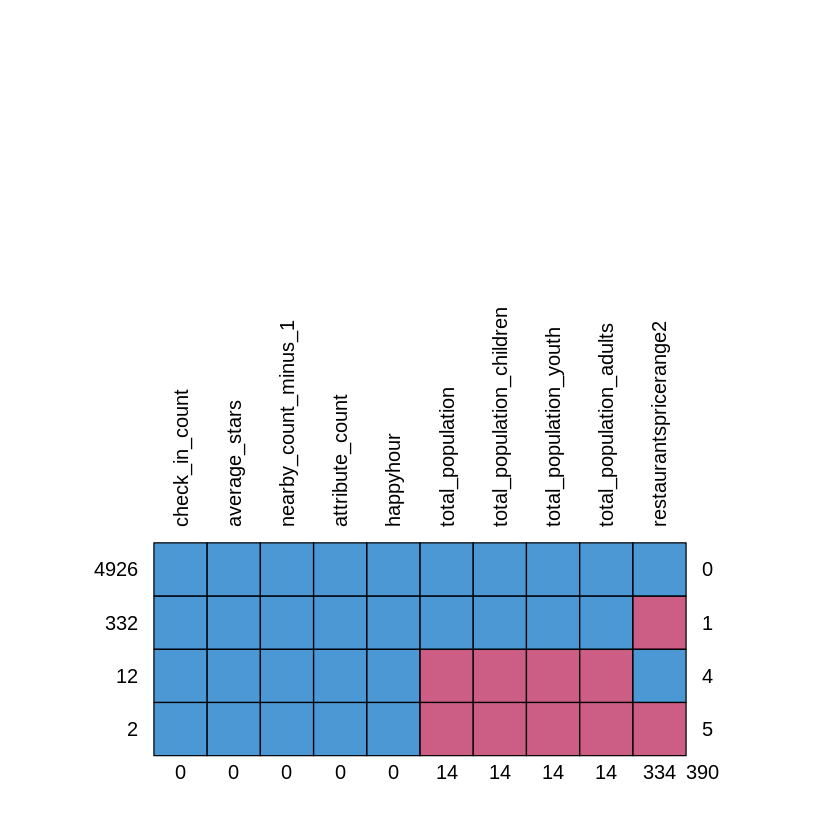

In [596]:
#inspect pattern of missings
md.pattern(data_to_analysis, plot = TRUE, rotate.names = TRUE)

## Impute Data via Mice

In [ ]:
args(mice)

function (data, m = 5, method = NULL, predictorMatrix, ignore = NULL, 
    where = NULL, blocks, visitSequence = NULL, formulas, blots = NULL, 
    post = NULL, defaultMethod = c("pmm", "logreg", "polyreg", 
        "polr"), maxit = 5, printFlag = TRUE, seed = NA, data.init = NULL, 
    ...) 
NULL

In [ ]:
 ## m = num. of imputations
      # Rule of thum = at least as many imputations as percentage of missing vallues
 ## maxit = max num. of iterations

In [597]:
### Impute Data via mice
MiceImputedData <- mice(data_to_analysis, m=20, maxit = 50, seed = 543, print=FALSE)

In [598]:
summary(MiceImputedData)

Class: mids
Number of multiple imputations:  20 
Imputation methods:
           check_in_count             average_stars      nearby_count_minus_1 
                       ""                        ""                        "" 
          attribute_count    restaurantspricerange2                 happyhour 
                       ""                     "pmm"                        "" 
         total_population total_population_children    total_population_youth 
                    "pmm"                     "pmm"                     "pmm" 
  total_population_adults 
                    "pmm" 
PredictorMatrix:
                       check_in_count average_stars nearby_count_minus_1
check_in_count                      0             1                    1
average_stars                       1             0                    1
nearby_count_minus_1                1             1                    0
attribute_count                     1             1                    1
restaurantspricerange

## *Running the Model with Mice

### *Run with (2nd out of 20)

In [ ]:
#get complete data set (2nd out of 20)
MiceCompleteData <- complete(MiceImputedData, 2)

MiceCompleteData

In [600]:
model_after_mice <- lm(check_in_count ~
              average_stars
              + nearby_count_minus_1
              + attribute_count
              + restaurantspricerange2 * happyhour
              + total_population
              + total_population_children
              + total_population_youth
              + total_population_adults
                                                   ,MiceCompleteData)

In [601]:
summary(model_after_mice) #summary(MiceAllModels$analyses[[2]])


Call:
lm(formula = check_in_count ~ average_stars + nearby_count_minus_1 + 
    attribute_count + restaurantspricerange2 * happyhour + total_population + 
    total_population_children + total_population_youth + total_population_adults, 
    data = MiceCompleteData)

Residuals:
    Min      1Q  Median      3Q     Max 
 -87.27  -24.48   -8.92    8.13 1449.37 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -4.000e+01  4.539e+00  -8.811  < 2e-16 ***
average_stars                      5.581e+00  7.971e-01   7.001 2.85e-12 ***
nearby_count_minus_1               2.502e-02  2.707e-03   9.244  < 2e-16 ***
attribute_count                    3.498e+00  2.295e-01  15.239  < 2e-16 ***
restaurantspricerange2             8.704e+00  1.669e+00   5.215 1.91e-07 ***
happyhour1                        -4.662e+00  7.978e+00  -0.584  0.55898    
total_population                  -2.300e-03  7.647e-04  -3.007  0.00265 ** 
total_p

### *Run with pooled_mice

In [602]:
#build predictive model for all generated imputed data sets
MiceAllModels <- with(MiceImputedData, lm(check_in_count ~
              average_stars
              + nearby_count_minus_1
              + attribute_count
              + restaurantspricerange2 * happyhour
              + total_population
              + total_population_children
              + total_population_youth
              + total_population_adults))

In [603]:
#combine results of all 20 models
pooled_Mice <- pool(MiceAllModels)

**Results**

In [604]:
pooled_Mice_results <- as.data.frame(summary(pooled_Mice))
pooled_Mice_results

term,estimate,std.error,statistic,df,p.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-39.837018390,4.5413597964,-8.7720463,5245.317,2.337056e-18
average_stars,5.570444305,0.7975546371,6.9844046,5256.533,3.215920e-12
nearby_count_minus_1,0.025095285,0.0027081720,9.2665035,5254.612,2.743473e-20
attribute_count,3.508819401,0.2297047538,15.2753452,5237.758,1.423693e-51
restaurantspricerange2,8.536632638,1.6765153374,5.0918906,5146.310,3.671464e-07
happyhour1,-4.777900958,8.0105710126,-0.5964495,5096.557,5.509015e-01
total_population,-0.002299911,0.0007653986,-3.0048535,5253.447,2.669631e-03
total_population_children,0.002128556,0.0008215839,2.5907955,5253.747,9.601907e-03
total_population_youth,0.002111579,0.0007595804,2.7799289,5253.888,5.456426e-03


In [605]:
# Adding significance level visualization to the above df:

pooled_Mice_results %>%
    mutate(sign = case_when(p.value >=0 & p.value < 0.001 ~ '***',
                              p.value >=0.001 & p.value < 0.01 ~ '**',
                                p.value >=0.01 & p.value < 0.05 ~ '*',
                                 p.value >=0.05 & p.value < 0.1 ~ '.',
                                  p.value >= 0.1 ~ ' ')
)

term,estimate,std.error,statistic,df,p.value,sign
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-39.837018390,4.5413597964,-8.7720463,5245.317,2.337056e-18,***
average_stars,5.570444305,0.7975546371,6.9844046,5256.533,3.215920e-12,***
nearby_count_minus_1,0.025095285,0.0027081720,9.2665035,5254.612,2.743473e-20,***
attribute_count,3.508819401,0.2297047538,15.2753452,5237.758,1.423693e-51,***
restaurantspricerange2,8.536632638,1.6765153374,5.0918906,5146.310,3.671464e-07,***
happyhour1,-4.777900958,8.0105710126,-0.5964495,5096.557,5.509015e-01,
total_population,-0.002299911,0.0007653986,-3.0048535,5253.447,2.669631e-03,**
total_population_children,0.002128556,0.0008215839,2.5907955,5253.747,9.601907e-03,**
total_population_youth,0.002111579,0.0007595804,2.7799289,5253.888,5.456426e-03,**


In [ ]:
#   0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [606]:
# R-square for Pooled Model.

pooled_R_2 <- pool.r.squared(MiceAllModels)
pooled_R_2

,est,lo 95,hi 95,fmi
R^2,0.1597033,0.141899,0.1781461,0.0002420914


# Extended Model

## Creating a Subset

In [ ]:
#install.packages("mice")

In [ ]:
library(mice)

In [609]:
# Selecting the variables for analysis:
data_to_analysis_2 <- data %>%
    select(check_in_count, average_stars, nearby_count_minus_1, attribute_count, restaurantspricerange2, happyhour,
                    total_population, total_population_children, total_population_youth, total_population_adults,
                          isromantic, isintimate, istouristy, ishipster, isdivey, isclassy, istrendy, isupscale, iscasual,
                            parking_garage, parking_street, parking_validated, parking_lot, parking_valet, parking_total,
                              alcohol, outdoorseating, restaurantstableservice, bikeparking, byob, businessacceptscreditcards,
                                restaurantscounterservice, hastv, restaurantsreservations, restaurantsdelivery, wifi,
                                  restaurantstakeout, n_photo)

## *Running the Model with NA's (Pre-Mice)

In [ ]:
# Check_in_frequency = β0 + β1 * avg_number_of_stars + β2 * business_proximity + β3 * number of characteristics + β4 * (price_level x happy hour) + ε

In [ ]:
#install.packages("car") #test
library(car)

In [610]:
model_pre_mice_2 <- lm(check_in_count ~
              average_stars
              + nearby_count_minus_1
              + attribute_count
              + restaurantspricerange2 * happyhour
              + total_population
              + total_population_children
              + total_population_youth
              + total_population_adults
              + isromantic
              + isintimate
              + istouristy
              + ishipster
              + isdivey
              + isclassy
              + istrendy
              + isupscale
              + iscasual
              + parking_garage
              + parking_street
              + parking_validated
              + parking_lot
              + parking_valet
              + parking_total
              + alcohol
              + outdoorseating
              + restaurantstableservice
              + bikeparking
              + byob
              + businessacceptscreditcards
              + restaurantscounterservice
              + hastv
              + restaurantsreservations
              + restaurantsdelivery
              + wifi
              + restaurantstakeout
              + n_photo
                                             ,data_to_analysis_2)

In [611]:
#car::vif(m1) #test
summary(model_pre_mice_2)


Call:
lm(formula = check_in_count ~ average_stars + nearby_count_minus_1 + 
    attribute_count + restaurantspricerange2 * happyhour + total_population + 
    total_population_children + total_population_youth + total_population_adults + 
    isromantic + isintimate + istouristy + ishipster + isdivey + 
    isclassy + istrendy + isupscale + iscasual + parking_garage + 
    parking_street + parking_validated + parking_lot + parking_valet + 
    parking_total + alcohol + outdoorseating + restaurantstableservice + 
    bikeparking + byob + businessacceptscreditcards + restaurantscounterservice + 
    hastv + restaurantsreservations + restaurantsdelivery + wifi + 
    restaurantstakeout + n_photo, data = data_to_analysis_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-315.88  -16.11   -2.95    9.32 1253.68 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -2.472e+00  5.584e+00  -0.443 0.658044    
averag

In [ ]:
# (346 observations deleted due to missingness)

## Pattern of Missings

In [ ]:
args(md.pattern)

function (x, plot = TRUE, rotate.names = FALSE) 
NULL

,check_in_count,average_stars,nearby_count_minus_1,attribute_count,happyhour,isromantic,isintimate,istouristy,ishipster,isdivey,⋯,restaurantsdelivery,wifi,restaurantstakeout,n_photo,total_population,total_population_children,total_population_youth,total_population_adults,restaurantspricerange2,
4926,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,0
332,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,0,1
12,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,0,0,0,0,1,4
2,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,0,0,0,0,0,5
,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,14,14,14,14,334,390


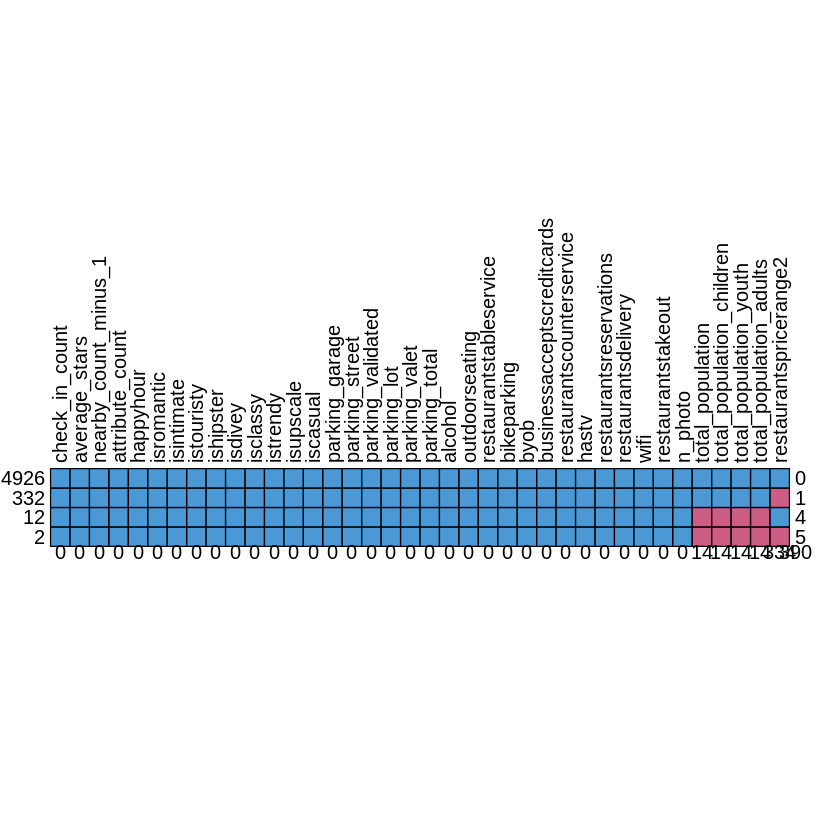

In [612]:
#inspect pattern of missings
md.pattern(data_to_analysis_2, plot = TRUE, rotate.names = TRUE)

## Impute Data via Mice

In [ ]:
args(mice)

function (data, m = 5, method = NULL, predictorMatrix, ignore = NULL, 
    where = NULL, blocks, visitSequence = NULL, formulas, blots = NULL, 
    post = NULL, defaultMethod = c("pmm", "logreg", "polyreg", 
        "polr"), maxit = 5, printFlag = TRUE, seed = NA, data.init = NULL, 
    ...) 
NULL

In [ ]:
 ## m = num. of imputations
      # Rule of thum = at least as many imputations as percentage of missing vallues
 ## maxit = max num. of iterations

In [613]:
### Impute Data via mice
MiceImputedData_2 <- mice(data_to_analysis_2, m=20, maxit = 50, seed = 5454, print=FALSE)

In [ ]:
summary(MiceImputedData_2)

## *Running the Model with Mice

### *Run with (x.th out of 20)

In [615]:
set.seed(123)
sample(1:20, 1)

[1] 15

In [ ]:
#get complete data set (2nd out of 20)
MiceCompleteData_2 <- complete(MiceImputedData_2, 15)

MiceCompleteData_2

In [618]:
model_after_mice_2 <- lm(check_in_count ~
              average_stars
              + nearby_count_minus_1
              + attribute_count
              + restaurantspricerange2 * happyhour
              + total_population
              + total_population_children
              + total_population_youth
              + total_population_adults
              + isromantic
              + isintimate
              + istouristy
              + ishipster
              + isdivey
              + isclassy
              + istrendy
              + isupscale
              + iscasual
              + parking_garage
              + parking_street
              + parking_validated
              + parking_lot
              + parking_valet
              + parking_total
              + alcohol
              + outdoorseating
              + restaurantstableservice
              + bikeparking
              + byob
              + businessacceptscreditcards
              + restaurantscounterservice
              + hastv
              + restaurantsreservations
              + restaurantsdelivery
              + wifi
              + restaurantstakeout
              + n_photo
                                          ,MiceCompleteData_2)

In [619]:
summary(model_after_mice_2) #summary(MiceAllModels$analyses[[2]])


Call:
lm(formula = check_in_count ~ average_stars + nearby_count_minus_1 + 
    attribute_count + restaurantspricerange2 * happyhour + total_population + 
    total_population_children + total_population_youth + total_population_adults + 
    isromantic + isintimate + istouristy + ishipster + isdivey + 
    isclassy + istrendy + isupscale + iscasual + parking_garage + 
    parking_street + parking_validated + parking_lot + parking_valet + 
    parking_total + alcohol + outdoorseating + restaurantstableservice + 
    bikeparking + byob + businessacceptscreditcards + restaurantscounterservice + 
    hastv + restaurantsreservations + restaurantsdelivery + wifi + 
    restaurantstakeout + n_photo, data = MiceCompleteData_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-314.09  -15.36   -2.82    8.77 1252.98 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -3.904e+00  4.951e+00  -0.788 0.430441    
averag

### *Run with pooled_mice

In [620]:
#build predictive model for all generated imputed data sets
MiceAllModels_2 <- with(MiceImputedData_2, lm(check_in_count ~
              average_stars
              + nearby_count_minus_1
              + attribute_count
              + restaurantspricerange2 * happyhour
              + total_population
              + total_population_children
              + total_population_youth
              + total_population_adults
              + isromantic
              + isintimate
              + istouristy
              + ishipster
              + isdivey
              + isclassy
              + istrendy
              + isupscale
              + iscasual
              + parking_garage
              + parking_street
              + parking_validated
              + parking_lot
              + parking_valet
              + parking_total
              + alcohol
              + outdoorseating
              + restaurantstableservice
              + bikeparking
              + byob
              + businessacceptscreditcards
              + restaurantscounterservice
              + hastv
              + restaurantsreservations
              + restaurantsdelivery
              + wifi
              + restaurantstakeout
              + n_photo))

In [621]:
#combine results of all 20 models
pooled_Mice_2 <- pool(MiceAllModels_2)

**Results**

In [622]:
pooled_Mice_results_2 <- as.data.frame(summary(pooled_Mice_2))
pooled_Mice_results_2

term,estimate,std.error,statistic,df,p.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-3.912266581,4.929753e+00,-0.7936029,5206.771,4.274628e-01
average_stars,3.032823316,6.821651e-01,4.4458786,5228.464,8.934514e-06
nearby_count_minus_1,0.014784520,2.381501e-03,6.2080675,5226.860,5.777910e-10
attribute_count,2.276108881,4.312117e-01,5.2784024,5228.464,1.355799e-07
restaurantspricerange2,1.125431657,1.576611e+00,0.7138299,4931.816,4.753662e-01
happyhour1,-1.732958872,6.878046e+00,-0.2519551,4602.584,8.010870e-01
total_population,-0.001266010,6.447571e-04,-1.9635456,5224.316,4.963577e-02
total_population_children,0.001523435,6.829593e-04,2.2306382,5221.100,2.574743e-02
total_population_youth,0.001073836,6.418657e-04,1.6729921,5224.917,9.438872e-02


In [623]:
# Adding significance level visualization to the above df:

pooled_Mice_results_2 %>%
    mutate(sign = case_when(p.value >=0 & p.value < 0.001 ~ '***',
                              p.value >=0.001 & p.value < 0.01 ~ '**',
                                p.value >=0.01 & p.value < 0.05 ~ '*',
                                 p.value >=0.05 & p.value < 0.1 ~ '.',
                                  p.value >= 0.1 ~ ' ')
)

term,estimate,std.error,statistic,df,p.value,sign
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-3.912266581,4.929753e+00,-0.7936029,5206.771,4.274628e-01,
average_stars,3.032823316,6.821651e-01,4.4458786,5228.464,8.934514e-06,***
nearby_count_minus_1,0.014784520,2.381501e-03,6.2080675,5226.860,5.777910e-10,***
attribute_count,2.276108881,4.312117e-01,5.2784024,5228.464,1.355799e-07,***
restaurantspricerange2,1.125431657,1.576611e+00,0.7138299,4931.816,4.753662e-01,
happyhour1,-1.732958872,6.878046e+00,-0.2519551,4602.584,8.010870e-01,
total_population,-0.001266010,6.447571e-04,-1.9635456,5224.316,4.963577e-02,*
total_population_children,0.001523435,6.829593e-04,2.2306382,5221.100,2.574743e-02,*
total_population_youth,0.001073836,6.418657e-04,1.6729921,5224.917,9.438872e-02,.


In [ ]:
#   0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [624]:
# R-square for Pooled Model.

pooled_R_2_2 <- pool.r.squared(MiceAllModels_2)
pooled_R_2_2

,est,lo 95,hi 95,fmi
R^2,0.4432065,0.4230614,0.4630843,6.663628e-06


#ML Prep.

## Data Prep.

### Binning Check_ins

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


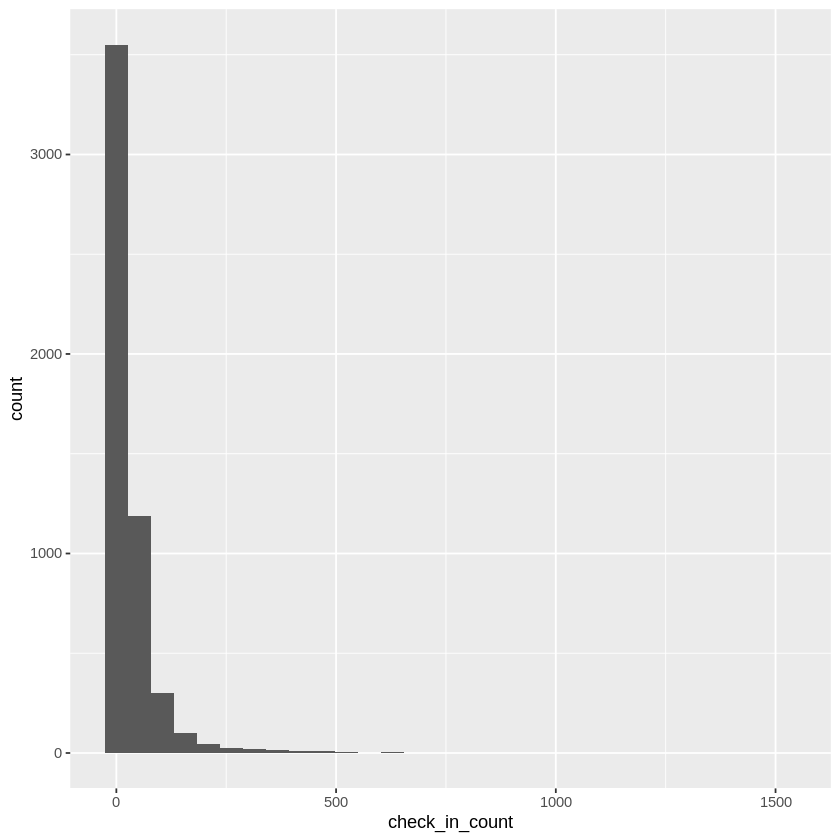

In [797]:
ggplot(MiceCompleteData_2, aes(check_in_count))+
  geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


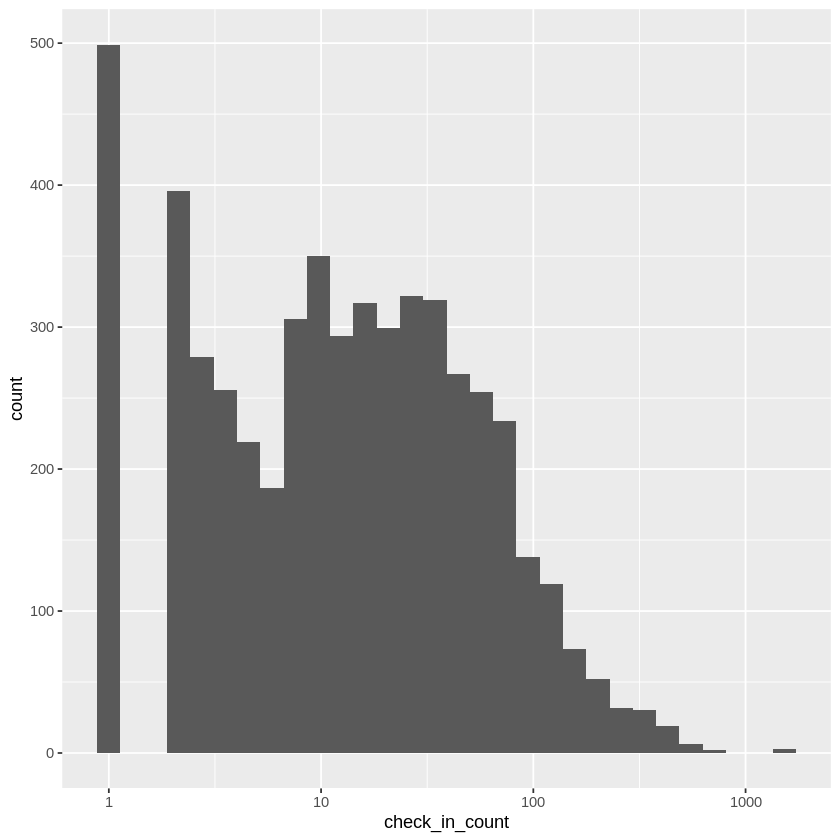

In [798]:
ggplot(MiceCompleteData_2, aes(check_in_count))+
  geom_histogram()+
  scale_x_log10()

In [809]:
#Adding log10(check_in_count_pre_2020) to the df:

data_mice_bin_calc1 <- MiceCompleteData_2 %>%
  mutate(check_in_count_LOG = log10(check_in_count))

In [810]:
#Determine the range:
min_log <- min(data_mice_bin_calc1$check_in_count_LOG, na.rm = TRUE)
max_log <- max(data_mice_bin_calc1$check_in_count_LOG, na.rm = TRUE)

min_log
max_log

[1] 0

[1] 3.182415

In [811]:
# Number of bins:
number_of_bins <- 2

# Creating the bin edges:
breaks <- seq(min_log, max_log, length.out = number_of_bins + 1)

In [812]:
# Calculating bins, and adding into df:

data_mice_bin_calc2 <- data_mice_bin_calc1 %>%
  mutate(check_in_bin = cut(data_mice_bin_calc1$check_in_count_LOG, breaks = breaks, labels = FALSE, include.lowest = TRUE))

In [813]:
head(data_mice_bin_calc2)

,check_in_count,average_stars,nearby_count_minus_1,attribute_count,restaurantspricerange2,happyhour,total_population,total_population_children,total_population_youth,total_population_adults,⋯,businessacceptscreditcards,restaurantscounterservice,hastv,restaurantsreservations,restaurantsdelivery,wifi,restaurantstakeout,n_photo,check_in_count_LOG,check_in_bin
,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>
1,2,2.0000,163,9,1,0,41271,8924,6658,20247,⋯,0,0,1,0,1,No,1,0,0.3010300,1
2,2,0.0000,163,9,1,0,41271,8924,6658,20247,⋯,0,0,1,0,1,No,1,0,0.3010300,1
3,8,4.7500,11,8,1,0,35239,4124,5312,20997,⋯,0,0,0,0,0,No,1,5,0.9030900,1
4,6,4.9286,11,8,1,0,35239,4124,5312,20997,⋯,0,0,0,0,0,No,1,5,0.7781513,1
5,5,2.2000,45,8,2,0,9808,1402,1373,5324,⋯,1,0,1,1,0,Free,1,0,0.6989700,1
6,4,2.6000,45,8,2,0,9808,1402,1373,5324,⋯,1,0,1,1,0,Free,1,0,0.6020600,1


In [814]:
table(data_mice_bin_calc2$check_in_bin)


   1    2 
4043 1229 

In [815]:
# Renaming bins as Dummy, and adding corresponding string:

data_mice_bin_calc2$check_in_bin <- as.character(data_mice_bin_calc2$check_in_bin) #Required to be able to use recode()

data_mice_bin_calc3 <- data_mice_bin_calc2 %>%
  mutate(ch_in = recode(check_in_bin,


                               "2" = "1",
                               "1" = "0"),
        ch_in_string = recode(check_in_bin,


                               "2" = "High_Range",
                               "1" = "Low_Range")
                               )

data_mice_bin_calc3$ch_in <- as.integer(data_mice_bin_calc3$ch_in)

data_mice_bin_calc3$ch_in_string <- as.factor(data_mice_bin_calc3$ch_in_string)

In [816]:
data_mice_bin_calc3$ch_in_string <- relevel(data_mice_bin_calc3$ch_in_string,ref="Low_Range")

In [817]:
head(data_mice_bin_calc3)

,check_in_count,average_stars,nearby_count_minus_1,attribute_count,restaurantspricerange2,happyhour,total_population,total_population_children,total_population_youth,total_population_adults,⋯,hastv,restaurantsreservations,restaurantsdelivery,wifi,restaurantstakeout,n_photo,check_in_count_LOG,check_in_bin,ch_in,ch_in_string
,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<chr>,<int>,<fct>
1,2,2.0000,163,9,1,0,41271,8924,6658,20247,⋯,1,0,1,No,1,0,0.3010300,1,0,Low_Range
2,2,0.0000,163,9,1,0,41271,8924,6658,20247,⋯,1,0,1,No,1,0,0.3010300,1,0,Low_Range
3,8,4.7500,11,8,1,0,35239,4124,5312,20997,⋯,0,0,0,No,1,5,0.9030900,1,0,Low_Range
4,6,4.9286,11,8,1,0,35239,4124,5312,20997,⋯,0,0,0,No,1,5,0.7781513,1,0,Low_Range
5,5,2.2000,45,8,2,0,9808,1402,1373,5324,⋯,1,1,0,Free,1,0,0.6989700,1,0,Low_Range
6,4,2.6000,45,8,2,0,9808,1402,1373,5324,⋯,1,1,0,Free,1,0,0.6020600,1,0,Low_Range


In [818]:
#Rename Dataset:

data_mice_bin <- data_mice_bin_calc3

In [819]:
table(data_mice_bin$ch_in_string)


 Low_Range High_Range 
      4043       1229 

TEST

In [820]:
quartiles <- data_mice_bin_calc3 %>%
  summarize(upper = quantile(check_in_count_LOG, 0.667))

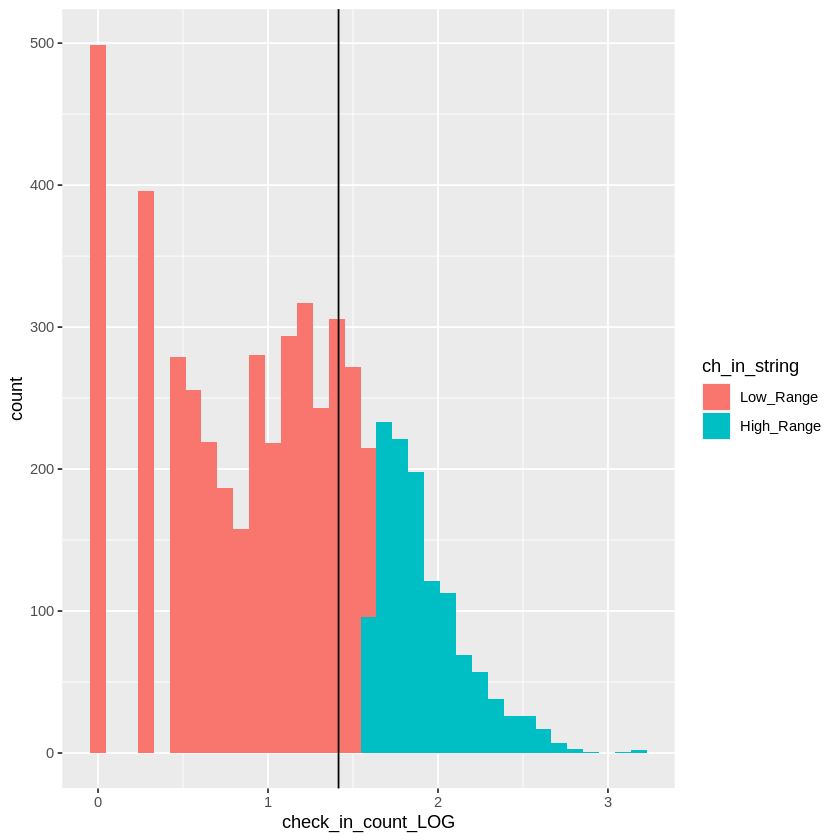

In [821]:
#Visualization of Bins:

ggplot(data_mice_bin_calc3, aes(check_in_count_LOG, fill = ch_in_string))+
  geom_histogram(bins=35)+
  geom_vline(data = quartiles, aes(xintercept = upper))

### Splitting Data into Test + Evaluation Data

In [ ]:
head(data_mice_bin)

In [822]:
varsin=c("ch_in_string", "ch_in",
            "average_stars", "nearby_count_minus_1", "attribute_count", "restaurantspricerange2", "happyhour",
              "total_population", "total_population_children", "total_population_youth", "total_population_adults",
              "isromantic", "isintimate", "istouristy", "ishipster", "isdivey", "isclassy", "istrendy", "isupscale", "iscasual",
                            "parking_garage", "parking_street", "parking_validated", "parking_lot", "parking_valet", "parking_total",
                              "alcohol", "outdoorseating", "restaurantstableservice", "bikeparking", "byob", "businessacceptscreditcards",
                                "restaurantscounterservice", "hastv", "restaurantsreservations", "restaurantsdelivery", "wifi",
                                  "restaurantstakeout", "n_photo")
data_mice_bin=subset(data_mice_bin,select=varsin)

In [823]:
datasetsize <- nrow(data_mice_bin)

In [824]:
set.seed(9876)

x <- data_mice_bin[sample(1:nrow(data_mice_bin), datasetsize, replace = F),]
x.train <- x[1:floor(nrow(x)*.75), ]
x.evaluate <- x[(floor(nrow(x)*.75)+1):nrow(x), ]

In [825]:
table(x.train$ch_in_string)


 Low_Range High_Range 
      3025        929 

### Class Imbalance

#### SMOTE for Minority Class

In [ ]:
#install.packages("caret")

In [648]:
library(caret)

In [826]:
BaseFormula <- as.formula(paste0("ch_in_string~",paste(varsin[-c(1,2)],collapse = "+")))
BaseFormula1 <- as.formula(paste0("ch_in~",paste(varsin[-c(1,2)],collapse = "+")))


# create dummies (required for SMOTE)
x.traindum=cbind(x.train[,c("ch_in","ch_in_string")],predict(dummyVars(BaseFormula1,data=x.train),newdata = x.train))
x.evaluatedum=cbind(x.evaluate[,c("ch_in","ch_in_string")],predict(dummyVars(BaseFormula1,data=x.evaluate),newdata = x.evaluate))

In [ ]:
#Control:

str(x.traindum)

In [ ]:
# args(SMOTE):

# X = A data frame or matrix of numeric-attributed dataset.
# target = A vector of a target class attribute corresponding to a dataset X.
# K = The number of nearest neighbors during sampling process.
# dup_size = The number or vector representing the desired times of synthetic minority instances over the original number of majority instances.

In [831]:
# SMOTE:
set.seed(3321)
x.traindum_smote <- SMOTE(x.traindum[,-c(1,2)],x.traindum[,2])$data

table(x.traindum_smote$class)


High_Range  Low_Range 
      2787       3025 

In [832]:
#Adding class factors as dummy + renaming columns:

x.traindum_smote <- x.traindum_smote %>%
                    mutate(ch_in = recode(class,


                               "High_Range" = "1",
                               "Low_Range" = "0")
                               ) %>%
                                    rename(ch_in_string = class)

x.traindum_smote$ch_in_string <- as.factor(x.traindum_smote$ch_in_string)
x.traindum_smote$ch_in <- as.integer(x.traindum_smote$ch_in)

In [834]:
x.traindum_smote$ch_in_string <- relevel(x.traindum_smote$ch_in_string,ref="Low_Range")

In [835]:
table(x.traindum_smote$ch_in_string)


 Low_Range High_Range 
      3025       2787 

In [836]:
#Assign news train data to its original name:
x.traindum <- x.traindum_smote

## Data for Heuristic Machine Learning Methods

### Normalization

In [837]:
# normalize data (very important for ML techniques, but not for logistic regression)
x.trainnorm=predict(preProcess(x.traindum, method = "range"), newdata=x.traindum)
x.evaluatenorm=predict(preProcess(x.evaluatedum, method = "range"), newdata=x.evaluatedum)

### Adjust Baseformula to the Dummy Version of the Data

In [838]:
varsin_dum = varsin[1:2]
for(i in 3:length(varsin)){
  if(!is.null(levels(x[,varsin[i]]))){
    for(j in 2:nlevels(x[,varsin[i]])){ # first level will be considered as the base-level
      varsin_dum = c(varsin_dum, paste(varsin[i], levels(x[,varsin[i]])[j], sep = "."))
    }
  } else {
    varsin_dum = c(varsin_dum, varsin[i])
  }
}

### Redo the Releveling

In [839]:
# Redo the releveling:
x.traindum$ch_in_string=relevel(x.traindum$ch_in_string,ref="Low_Range")
x.evaluatedum$ch_in_string=relevel(x.evaluatedum$ch_in_string,ref="Low_Range")
x.trainnorm$ch_in_string=relevel(x.trainnorm$ch_in_string,ref="Low_Range")
x.evaluatenorm$ch_in_string=relevel(x.evaluatenorm$ch_in_string,ref="Low_Range")

In [840]:
BaseFormula_dum <- as.formula(paste0("ch_in_string~",paste(varsin_dum[-c(1,2)],collapse = "+")))
BaseFormula1_dum <- as.formula(paste0("ch_in~",paste(varsin_dum[-c(1,2)],collapse = "+")))

### Set Threshold Probability

In [841]:
# set threshold probability: usually .5, but better is to set it to the portion of 1's.
probthres=mean(x.traindum$ch_in)

### makeLiftPlot

In [842]:
makeLiftPlot <- function(Prediction, Evaluate, ModelName){
  # plots the liftplot, and computes the GINI coefficient.
  iPredictionsSorted <- sort(Prediction,index.return=T,decreasing=T)[2]$ix #extract the index order according to predicted retention
  CustomersSorted <- Evaluate$ch_in_string[iPredictionsSorted] #sort the true behavior of customers according to predictions
  SumChurnReal<- sum(Evaluate$ch_in_string == "High_Range") #total number of real churners in the evaluation set
  CustomerCumulative=seq(nrow(Evaluate))/nrow(Evaluate) #cumulative fraction of customers
  ChurnCumulative=apply(matrix(CustomersSorted=="High_Range"),2,cumsum)/SumChurnReal #cumulative fraction of churners
  ProbTD = sum(CustomersSorted[1:floor(nrow(Evaluate)*.1)]=="High_Range")/floor(nrow(Evaluate)*.1) #probability of churn in 1st decile
  ProbOverall = SumChurnReal / nrow(Evaluate) #overall churn probability
  TDL = ProbTD / ProbOverall
  GINI = sum((ChurnCumulative-CustomerCumulative)/(t(matrix(1,1,nrow(Evaluate))-CustomerCumulative)),na.rm=T)/nrow(Evaluate)
  plot(CustomerCumulative,ChurnCumulative,type="l",main=paste("Lift curve of", ModelName),xlab="Cumulative fraction of check-ins (sorted by predicted check-in probability)",ylab="Cumulative fraction of check-ins")
  lines(c(0,1),c(0,1),col="blue",type="l",pch=22, lty=2)
  legend(.66,.2,c("According to model","Random selection"),cex=0.8,  col=c("black","blue"), lty=1:2)
  text(0.15,1,paste("TDL = ",round(TDL,2), "; GINI = ", round(GINI,2) ))
  return(data.frame(TDL,GINI))
}

# ML Application

## LOGIT

In [843]:
ptm <- proc.time()
x.modelLogit <- glm(BaseFormula_dum , data = x.traindum, family = "binomial") # estimating the probability of having an "Above Average" restourant.

summary(x.modelLogit)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = BaseFormula_dum, family = "binomial", data = x.traindum)

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -5.154e+00  3.835e-01 -13.440  < 2e-16 ***
average_stars                 4.333e-01  5.892e-02   7.353 1.93e-13 ***
nearby_count_minus_1          7.709e-04  1.294e-04   5.957 2.57e-09 ***
attribute_count               1.487e-01  2.483e-02   5.989 2.11e-09 ***
restaurantspricerange2        3.789e-01  9.349e-02   4.053 5.05e-05 ***
happyhour.1                  -1.891e-01  1.260e-01  -1.500 0.133603    
total_population             -1.362e-04  4.043e-05  -3.368 0.000758 ***
total_population_children     4.304e-05  4.614e-05   0.933 0.350915    
total_population_youth        1.309e-04  4.028e-05   3.249 0.001157 ** 
total_population_adults       1.776e-04  5.115e-05   3.472 0.000516 ***
isromantic.1                 -1.521e+00  3.349e-01  -4.542 5.57e-06 ***
isintimate.1                 -9.930e-01  2.

In [844]:
x.evaluate$predictionlogit <- predict(x.modelLogit, newdata=x.evaluatedum, type = "response")
x.evaluate$predictionlogitclass[x.evaluate$predictionlogit>probthres] <- "High_Range"
x.evaluate$predictionlogitclass[x.evaluate$predictionlogit<=probthres] <- "Low_Range"

In [845]:
x.evaluate$correctlogit <- x.evaluate$predictionlogitclass == x.evaluate$ch_in_string
print(paste("% of predicted classifications correct", mean(x.evaluate$correctlogit)))

[1] "% of predicted classifications correct 0.824734446130501"


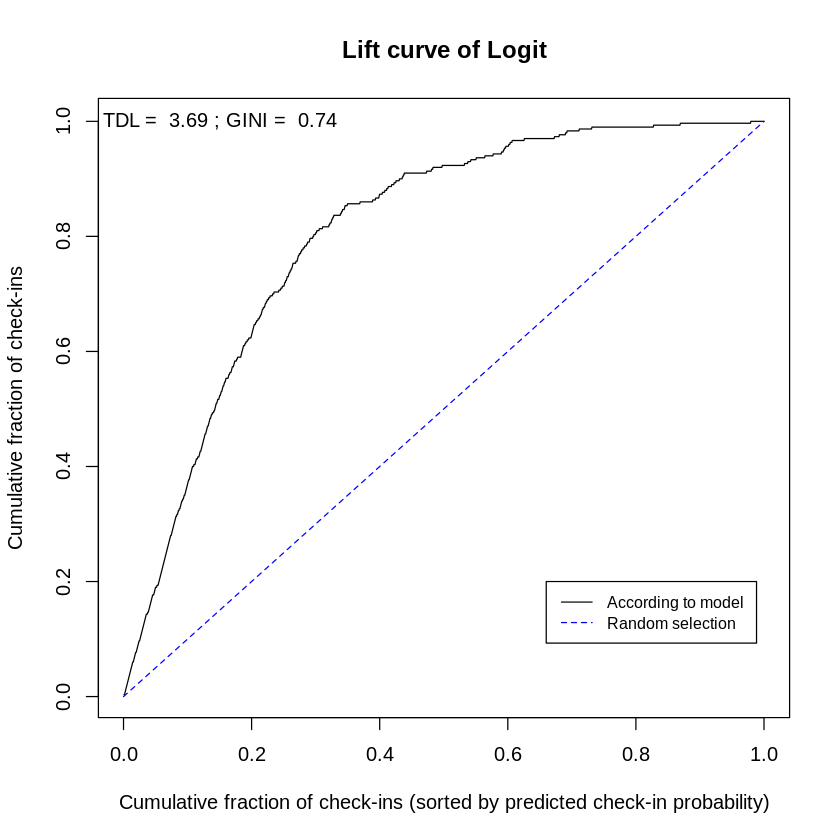

In [846]:
LogitOutput <- makeLiftPlot(x.evaluate$predictionlogit,x.evaluate,"Logit")

In [847]:
TimeAux <- proc.time() - ptm
#LogitOutput$summary=summary(x.modelLogit)
LogitOutput$TimeElapsed <- TimeAux[3]
LogitOutput$PercCorrect <- mean(x.evaluate$correctlogit)*100
Logitconfmatrix <- table(x.evaluate$predictionlogitclass,x.evaluate$ch_in_string)
rm(TimeAux)

In [848]:
LogitOutput$TimeElapsed

[1] 56.02

In [849]:
LogitOutput$PercCorrect

[1] 82.47344

In [850]:
Logitconfmatrix

            
             Low_Range High_Range
  High_Range       177        246
  Low_Range        841         54

## Naive Bayes

In [855]:
x.modelNB <- train(BaseFormula_dum, data = x.trainnorm, method="naive_bayes")

x.evaluate$predictionNB <- predict(x.modelNB, newdata=x.evaluatenorm,type="prob")

x.evaluate$predictionNBclass[x.evaluate$predictionNB[,'High_Range']>probthres]="High_Range"
x.evaluate$predictionNBclass[x.evaluate$predictionNB[,'High_Range']<=probthres]="Low_Range"

[1] "% of predicted classifications correct 0.810318664643399"
ROC curve variable importance

  only 20 most important variables shown (out of 39)

                          Importance
n_photo                       100.00
attribute_count                74.65
nearby_count_minus_1           56.71
isclassy.1                     54.00
alcohol.Full_bar               49.29
total_population_children      48.07
restaurantspricerange2         46.06
happyhour.1                    44.15
restaurantstableservice.1      43.54
outdoorseating.1               38.40
istrendy.1                     37.85
parking_street.1               37.63
total_population               36.99
iscasual.1                     34.79
restaurantsreservations.1      34.27
total_population_youth         32.94
total_population_adults        32.29
average_stars                  28.14
parking_total.1                25.55
bikeparking.1                  22.68


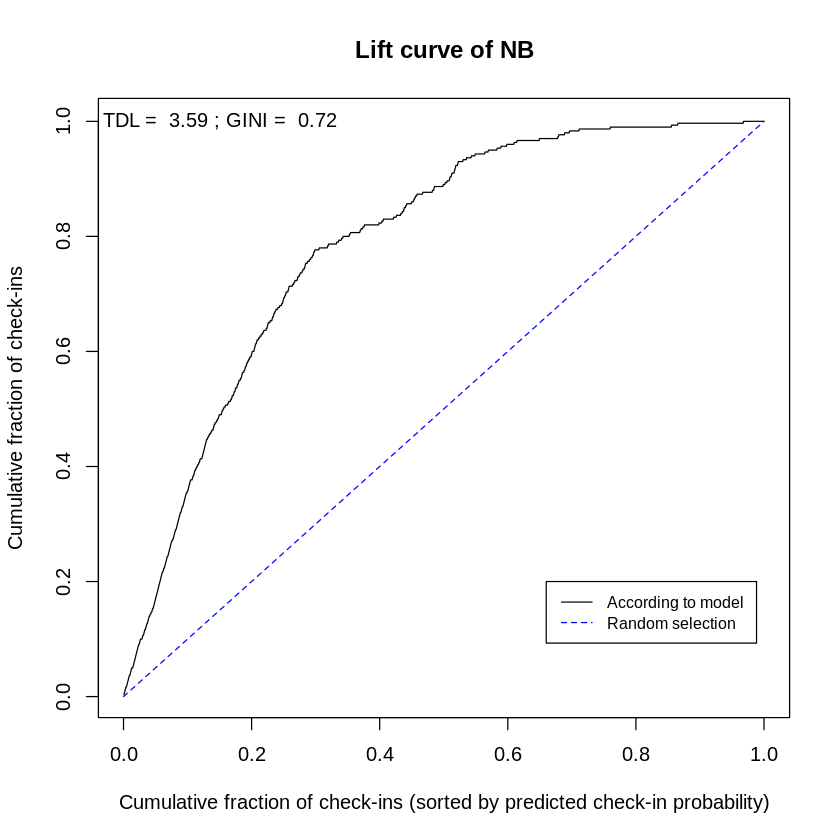

In [856]:
x.evaluate$correctNB <- x.evaluate$predictionNBclass == x.evaluate$ch_in_string
print(paste("% of predicted classifications correct", mean(x.evaluate$correctNB)))

# the variable importance
print(varImp(x.modelNB))

# Extract the class probabilities.
x.evaluate$predictionNB <- x.evaluate$predictionNB[,'High_Range']

NBOutput <- makeLiftPlot(x.evaluate$predictionNB,x.evaluate,"NB")

TimeAux <- proc.time() - ptm
NBOutput$TimeElapsed <- TimeAux[3]
NBOutput$PercCorrect <- mean(x.evaluate$correctNB)*100
NBconfmatrix <- table(x.evaluate$predictionNBclass,x.evaluate$ch_in_string)

In [853]:
NBOutput$PercCorrect

[1] 81.03187

In [854]:
NBconfmatrix

            
             Low_Range High_Range
  High_Range       184        234
  Low_Range        834         66

## KNN

[1] "% of predicted classifications correct 0.776176024279211"
ROC curve variable importance

  only 20 most important variables shown (out of 39)

                          Importance
n_photo                       100.00
attribute_count                74.65
nearby_count_minus_1           56.71
isclassy.1                     54.00
alcohol.Full_bar               49.29
total_population_children      48.07
restaurantspricerange2         46.06
happyhour.1                    44.15
restaurantstableservice.1      43.54
outdoorseating.1               38.40
istrendy.1                     37.85
parking_street.1               37.63
total_population               36.99
iscasual.1                     34.79
restaurantsreservations.1      34.27
total_population_youth         32.94
total_population_adults        32.29
average_stars                  28.14
parking_total.1                25.55
bikeparking.1                  22.68


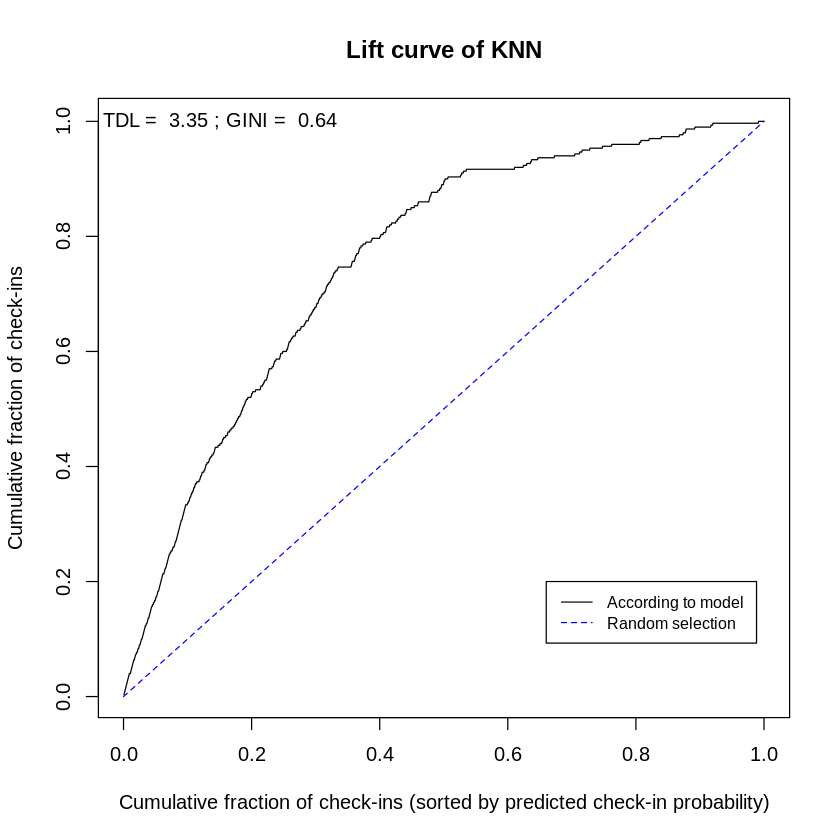

In [857]:
x.modelKNN <- train(BaseFormula_dum, data = x.trainnorm, method="knn")

x.evaluate$predictionKNN <- predict(x.modelKNN, newdata=x.evaluatenorm,type="prob")


x.evaluate$predictionKNNclass[x.evaluate$predictionKNN[,'High_Range']>probthres]="High_Range"
x.evaluate$predictionKNNclass[x.evaluate$predictionKNN[,'High_Range']<=probthres]="Low_Range"

x.evaluate$correctKNN <- x.evaluate$predictionKNNclass == x.evaluate$ch_in_string
print(paste("% of predicted classifications correct", mean(x.evaluate$correctKNN)))

# the variable importance
print(varImp(x.modelKNN))

# Extract the class probabilities.
x.evaluate$predictionKNN <- x.evaluate$predictionKNN[,'High_Range']

KNNOutput <- makeLiftPlot(x.evaluate$predictionKNN,x.evaluate,"KNN")

TimeAux <- proc.time() - ptm
KNNOutput$TimeElapsed <- TimeAux[3]
KNNOutput$PercCorrect <- mean(x.evaluate$correctKNN)*100
KNNconfmatrix <- table(x.evaluate$predictionKNNclass,x.evaluate$ch_in_string)
rm(TimeAux)

## SVM

In [861]:
############ SVM

ptm <- proc.time()
# fast trainer
x.modelSVM <- train(BaseFormula_dum, data = x.trainnorm, method="svmRadial", cachesize=12000, tolerance=.01,
                    trControl = trainControl(classProbs =  TRUE))

x.evaluate$predictionSVM <- predict(x.modelSVM, newdata=x.evaluatenorm, type="prob")


x.evaluate$predictionSVMclass[x.evaluate$predictionSVM[,'High_Range']>probthres]="High_Range"
x.evaluate$predictionSVMclass[x.evaluate$predictionSVM[,'High_Range']<=probthres]="Low_Range"

x.evaluate$correctSVM <- x.evaluate$predictionSVMclass == x.evaluate$ch_in_string
print(paste("% of predicted classifications correct", mean(x.evaluate$correctSVM)))

# for fast trainer you can also get the variable importance
print(varImp(x.modelSVM))

# Extract the class probabilities.
x.evaluate$predictionSVM <- x.evaluate$predictionSVM[,'High_Range']

SVMOutput <- makeLiftPlot(x.evaluate$predictionSVM,x.evaluate,"SVM")

TimeAux <- proc.time() - ptm
SVMOutput$TimeElapsed <- TimeAux[3]
SVMOutput$PercCorrect <- mean(x.evaluate$correctSVM)*100
SVMconfmatrix <- table(x.evaluate$predictionSVMclass,x.evaluate$ch_in_string)
rm(TimeAux)

line search fails -2.505747 0.0001759928 1.106888e-05 5.708378e-07 -4.342934e-08 -4.014229e-09 -4.830058e-13

Warning message in method$predict(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class prediction calculations failed; returning NAs”
Warning message in method$prob(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class probability calculations failed; returning NAs”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


## Neural Network

In [ ]:
install.packages("NeuralNetTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(NeuralNetTools)

In [ ]:
install.packages("RSNNS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(RSNNS)

Loading required package: Rcpp


Attaching package: ‘RSNNS’


The following objects are masked from ‘package:caret’:

    confusionMatrix, train




In [ ]:
########## Neural network
# fast trainer using parallel computations
ptm <- proc.time()
mlp_grid = expand.grid(layer1 = 5,
                       layer2 = 0,
                       layer3 = 0)

x.modelNNet <- train(BaseFormula_dum, data=x.trainnorm, method="mlpML",tuneGrid=mlp_grid)

x.evaluate$predictionNNet <- predict(x.modelNNet, newdata = x.evaluatenorm, type="prob")

x.evaluate$predictionNNetclass[x.evaluate$predictionNNet[,"Above_Average"]>probthres]="Above_Average"
x.evaluate$predictionNNetclass[x.evaluate$predictionNNet[,"Above_Average"]<=probthres]="Below_Average"


x.evaluate$correctNNet <- x.evaluate$predictionNNetclass == x.evaluate$ch_in_string
print(paste("% of predicted classifications correct", mean(x.evaluate$correctNNet)))

print(varImp(x.modelNNet))
# plot NNet
if(0){
  NeuralNetTools::plotnet(x.modelNNet$finalModel)
}
x.evaluate$predictionNNet <- x.evaluate$predictionNNet[,"Above_Average"]

NNetOutput <- makeLiftPlot(x.evaluate$predictionNNet,x.evaluate,"Neural Network")

TimeAux <- proc.time() - ptm
#NNetOutput$summary=varImp(x.modelNNet)
NNetOutput$TimeElapsed <- TimeAux[3]
NNetOutput$PercCorrect <- mean(x.evaluate$correctNNet)*100
NNetconfmatrix <- table(x.evaluate$predictionNNetclass,x.evaluate$ch_in_string)
rm(TimeAux)

ERROR: Error in UseMethod("train"): no applicable method for 'train' applied to an object of class "formula"
